In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 막대 위에 숫자 표시 함수
def annotate_countplot(ax, spacing=5):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{int(height):,}',  # 예: 1,234
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, spacing),
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

In [4]:
# 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
# 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    
    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [11]:
df1 = pd.read_csv('EDA/병합/train_8_성과정보.csv')

In [16]:
with pd.option_context('display.max_rows', None):
    display(resumetable(df1, 5))

데이터셋 크기: (2400000, 49)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값,4번째 값,5번째 값
0,기준년월,int64,0,6,201807,201807,201807,201807,201807
1,ID,object,0,400000,TRAIN_000000,TRAIN_000001,TRAIN_000002,TRAIN_000003,TRAIN_000004
2,증감율_이용건수_신용_전월,float64,0,1497553,0.454548,-0.511808,-0.062716,0.135707,0.0
3,증감율_이용건수_신판_전월,float64,0,1496398,0.454548,-0.511808,-0.062716,0.135707,0.0
4,증감율_이용건수_일시불_전월,float64,0,1494269,0.364727,-0.511808,0.067843,0.153975,0.0
5,증감율_이용건수_할부_전월,float64,0,55263,1.999996,0.0,-1.999996,-1.999996,0.0
6,증감율_이용건수_CA_전월,float64,0,12236,0.0,0.0,0.0,0.0,0.0
7,증감율_이용건수_체크_전월,float64,0,345407,0.0,0.0,0.0,0.0,0.0
8,증감율_이용건수_카드론_전월,float64,0,2,0.0,0.0,0.0,0.0,0.0
9,증감율_이용금액_신용_전월,float64,0,1636476,0.409766,-1.010817,-0.902166,-0.866052,0.000028


In [33]:
low_unique_cols = [col for col in df1.columns if df1[col].nunique(dropna=False) <= 5]

In [29]:
def plot_and_count_zero(df, column_name):
    # 고유값 정렬
    order = sorted(df[column_name].unique())
    
    # 카운트플롯
    ax = sns.countplot(data=df, x=column_name, hue=column_name, order=order)
    annotate_countplot(ax)
    plt.show()
    
    # 0 값 개수 계산
    zero_count = (df[column_name] == 0).sum()
    total = len(df)
    print(f"0값 개수: {zero_count} ({zero_count / total:.2%})")

In [34]:
def plot_and_count_zero2(df, col):
    # 고유값 정렬
    order = sorted(df[col].dropna().unique())
    
    # 카운트플롯
    ax = sns.countplot(data=df, x=col, hue=col, order=order)
    annotate_countplot(ax)
    plt.show()
    
    # 0 값 개수 계산
    zero_count = (df[col] == 0).sum()
    total = len(df)
    print(f"0값 개수: {zero_count} ({zero_count / total:.2%})")

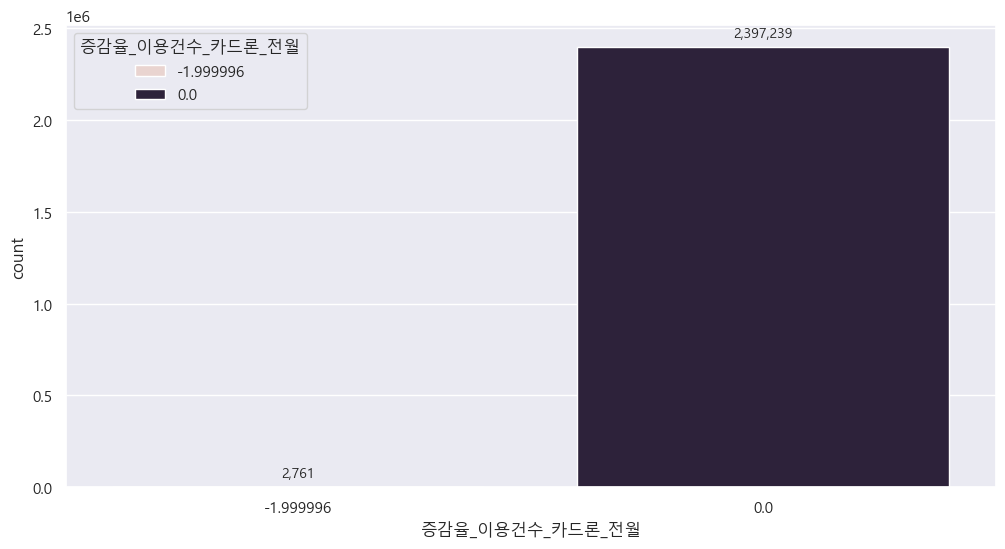

0값 개수: 2397239 (99.88%)


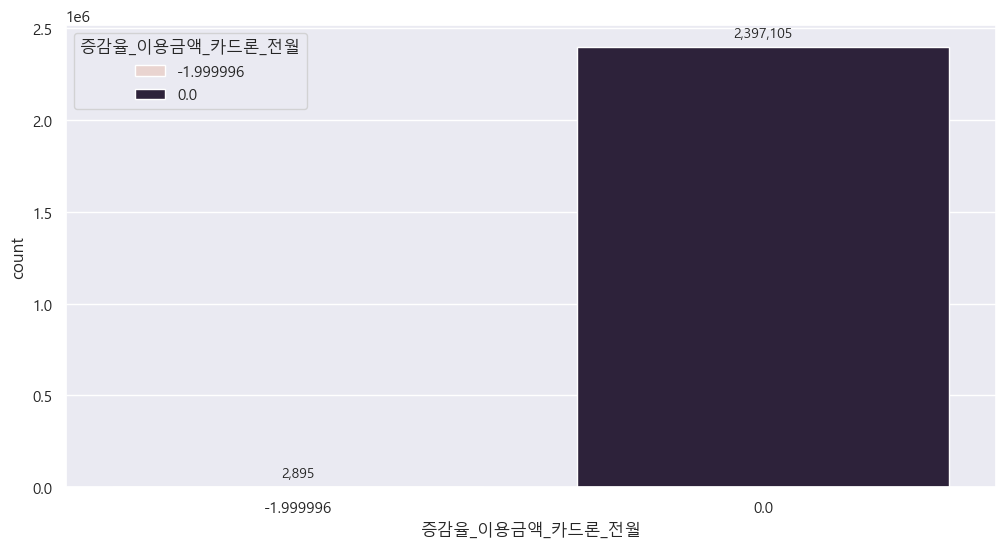

0값 개수: 2397105 (99.88%)


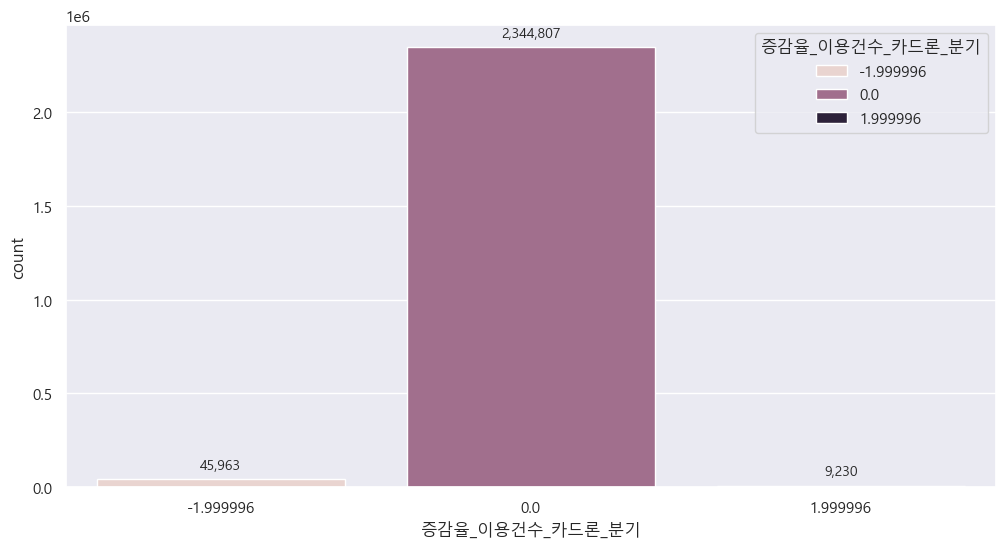

0값 개수: 2344807 (97.70%)


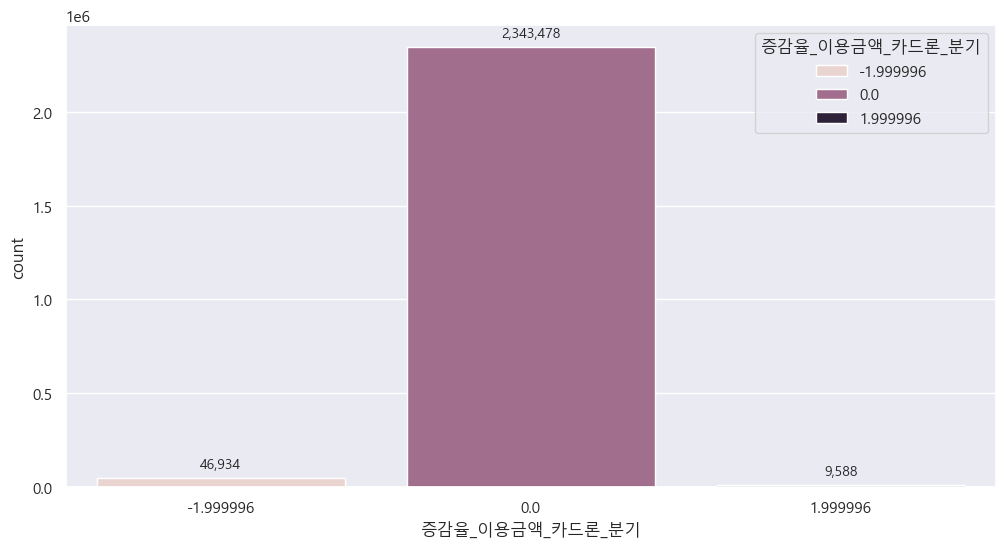

0값 개수: 2343478 (97.64%)


In [35]:
for col in low_unique_cols:
    plot_and_count_zero2(df1, col)

In [36]:
low_unique_cols

['증감율_이용건수_카드론_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_카드론_분기', '증감율_이용금액_카드론_분기']

In [46]:
df1['증감율_이용금액_카드론_분기'].value_counts(normalize = True)

증감율_이용금액_카드론_분기
 0.000000    0.976449
-1.999996    0.019556
 1.999996    0.003995
Name: proportion, dtype: float64